# Announcements

**Projects:** <br>
Start thinking about project ideas. 

**Project 0**

**Assignments and Projects**<br>
For assistance in your assignment or project, if you are close to the deadline (e.g., one day earlier), it may be harder to find help.


# Chapter 4: Building Good Training Sets, Data Pre-Processing

### Book: Python Machine Learning 
https://github.com/rasbt/python-machine-learning-book

[MIT License](https://github.com/rasbt/python-machine-learning-book/blob/master/LICENSE.txt)

Note that the optional watermark extension is a small IPython notebook plugin that I developed to make the code reproducible. You can just skip the following line(s).

In [1]:
%load_ext watermark
%watermark -a 'Sebastian Raschka' -u -d -p numpy,pandas,matplotlib,sklearn

Sebastian Raschka 
last updated: 2017-03-10 

numpy 1.12.0
pandas 0.19.2
matplotlib 2.0.0
sklearn 0.18.1


*The use of `watermark` is optional. You can install this IPython extension via "`pip install watermark`". For more information, please see: https://github.com/rasbt/watermark.*

### Overview

- [Dealing with missing data](#Dealing-with-missing-data)
  - [Eliminating samples or features with missing values](#Eliminating-samples-or-features-with-missing-values)
  - [Imputing missing values](#Imputing-missing-values)
  - [Understanding the scikit-learn estimator API](#Understanding-the-scikit-learn-estimator-API)
- [Handling categorical data](#Handling-categorical-data)
  - [Mapping ordinal features](#Mapping-ordinal-features)
  - [Encoding class labels](#Encoding-class-labels)
  - [Performing one-hot encoding on nominal features](#Performing-one-hot-encoding-on-nominal-features)
- [Partitioning a dataset in training and test sets](#Partitioning-a-dataset-in-training-and-test-sets)
- [Bringing features onto the same scale](#Bringing-features-onto-the-same-scale)
- [Selecting meaningful features](#Selecting-meaningful-features)
  - [Sparse solutions with L1 regularization](#Sparse-solutions-with-L1-regularization)
  - [Sequential feature selection algorithms](#Sequential-feature-selection-algorithms)
- [Assessing feature importance with random forests](#Assessing-feature-importance-with-random-forests)
- [Summary](#Summary)

In [2]:
from IPython.display import Image
%matplotlib inline

In [3]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

# Dealing with missing data

In [4]:
import pandas as pd
from io import StringIO

csv_data = '''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

# If you are using Python 2.7, you need
# to convert the string to unicode:
# csv_data = unicode(csv_data)

df = pd.read_csv(StringIO(csv_data))
df

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [5]:
df.isnull().sum()

A    0
B    0
C    1
D    1
dtype: int64

## Eliminating samples or features with missing values

In [6]:
df.dropna()

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [7]:
df.dropna(axis=1)

,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [8]:
# only drop rows where all columns are NaN
df.dropna(how='all')  

,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [9]:
# drop rows that have not at least 4 non-NaN values
df.dropna(thresh=4)

,A,B,C,D
0,1.0,2.0,3.0,4.0


In [10]:
# only drop rows where NaN appear in specific columns (here: 'C')
df.dropna(subset=['C'])

,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


## Imputing missing values

In [11]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df)
imputed_data = imr.transform(df.values)
imputed_data

array([[  1. ,   2. ,   3. ,   4. ],
       [  5. ,   6. ,   7.5,   8. ],
       [ 10. ,  11. ,  12. ,   6. ]])

In [12]:
df.values

array([[  1.,   2.,   3.,   4.],
       [  5.,   6.,  nan,   8.],
       [ 10.,  11.,  12.,  nan]])

## Understanding the scikit-learn estimator API

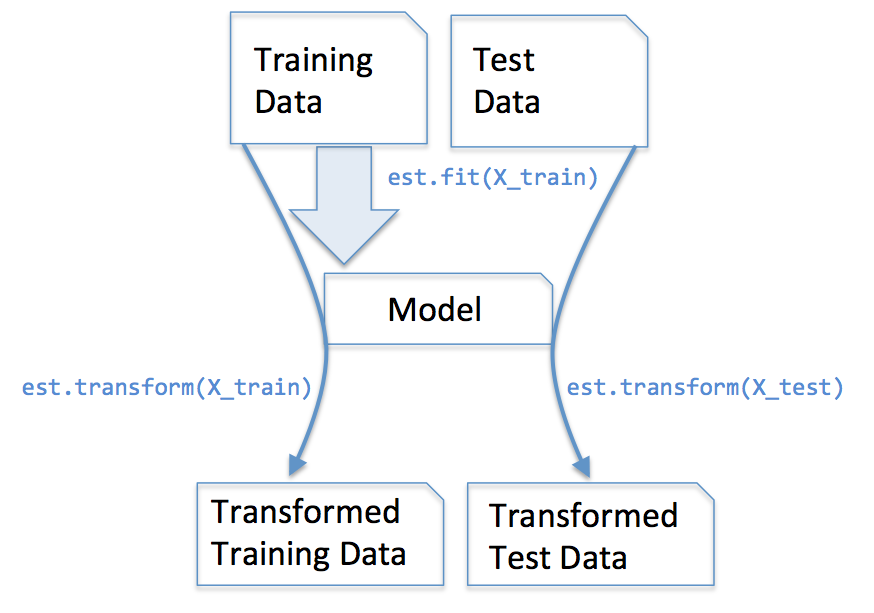

In [13]:
Image(filename='./images/04_04.png', width=400) 

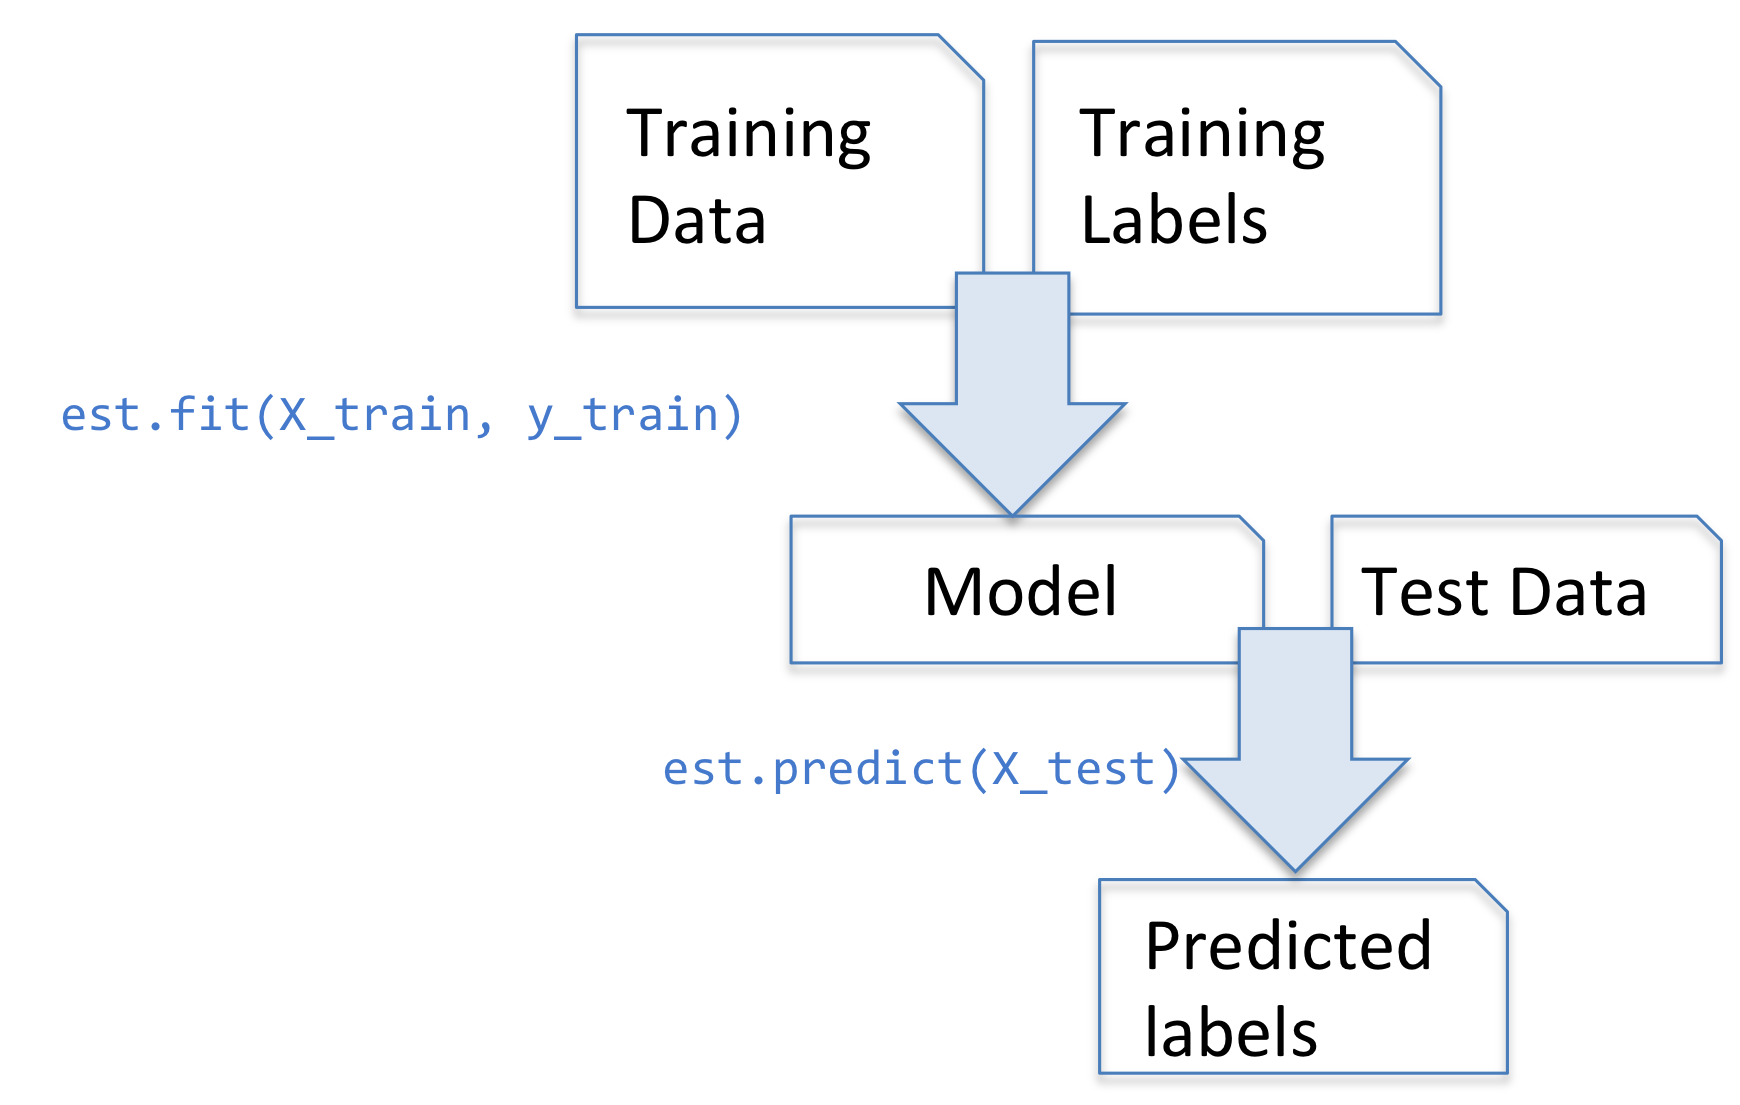

In [14]:
Image(filename='./images/04_05.png', width=400) 

# Handling categorical data

In [15]:
import pandas as pd

df = pd.DataFrame([['green', 'M', 10.1, 'class1'],
                   ['red', 'L', 13.5, 'class2'],
                   ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## Mapping ordinal features

In [16]:
size_mapping = {'XL': 3,
                'L': 2,
                'M': 1}

df['size'] = df['size'].map(size_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [17]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
df['size'].map(inv_size_mapping)

0     M
1     L
2    XL
Name: size, dtype: object

## Encoding class labels

In [18]:
import numpy as np

class_mapping = {label: idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping

{'class1': 0, 'class2': 1}

In [19]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [20]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df

,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [21]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y

array([0, 1, 0])

In [22]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## Performing one-hot encoding on nominal features

In [23]:
X = df[['color', 'size', 'price']].values

color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X

array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [24]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()

array([[  0. ,   1. ,   0. ,   1. ,  10.1],
       [  0. ,   0. ,   1. ,   2. ,  13.5],
       [  1. ,   0. ,   0. ,   3. ,  15.3]])

In [25]:
pd.get_dummies(df[['price', 'color', 'size']])

,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


# Partitioning a dataset in training and test sets

In [26]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash',
                   'Alcalinity of ash', 'Magnesium', 'Total phenols',
                   'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins',
                   'Color intensity', 'Hue', 'OD280/OD315 of diluted wines',
                   'Proline']

print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()

Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

### Note:


If the link to the Wine dataset provided above does not work for you, you can find a local copy in this repository at [./../datasets/wine/wine.data](./../datasets/wine.data).

Or you could fetch it via


In [27]:
df_wine = pd.read_csv('https://raw.githubusercontent.com/rasbt/python-machine-learning-book/master/code/datasets/wine/wine.data', header=None)

df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
'Alcalinity of ash', 'Magnesium', 'Total phenols', 
'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


<hr>

In [28]:
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0)

# Bringing features onto the same scale

In [29]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)

In [30]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

A visual example:

In [31]:
ex = pd.DataFrame([0, 1, 2, 3, 4, 5])

# standardize
ex[1] = (ex[0] - ex[0].mean()) / ex[0].std(ddof=0)

# Please note that pandas uses ddof=1 (sample standard deviation) by default, 
# whereas NumPy's std method and the StandardScaler uses ddof=0 (population standard deviation)

# normalize
ex[2] = (ex[0] - ex[0].min()) / (ex[0].max() - ex[0].min())
ex.columns = ['input', 'standardized', 'normalized']
ex

,input,standardized,normalized
0,0,-1.46385,0.0
1,1,-0.87831,0.2
2,2,-0.29277,0.4
3,3,0.29277,0.6
4,4,0.87831,0.8
5,5,1.46385,1.0


# Another Data Preprocessing Example
We use a data set from the UCI Machine Learning Repository
https://archive.ics.uci.edu/ml/datasets/Bank+Marketing 
to experiment with a Decision Tree classifier http://www.saedsayad.com/decision_tree.htm

Scikit-Learn: http://scikit-learn.org/stable/modules/tree.html#tree


### Bank Marketing Data Set 
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed. 


### Bank Marketing Data Set 

There are four datasets: 
1) bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014] <br>
2) bank-additional.csv with 10% of the examples (4119), randomly selected from 1), and 20 inputs.<br>
3) bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs). <br>
4) bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs). <br>

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM). 

**The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).**

### Bank Marketing Data Set 

Attribute Information:

Input variables:
- *bank client data:*
        1 age (numeric)
        2 job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
        3 marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
        4 education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
        5 default: has credit in default? (categorical: 'no','yes','unknown')
        6 housing: has housing loan? (categorical: 'no','yes','unknown')
        7 loan: has personal loan? (categorical: 'no','yes','unknown')
- *related with the last contact of the current campaign:*
        8 contact: contact communication type (categorical: 'cellular','telephone') 
        9 month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
        10 day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
        11 duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
- *other attributes:*
        12 campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
        13 pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
        14 previous: number of contacts performed before this campaign and for this client (numeric)
        15 poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- *social and economic context attributes*
        16 emp.var.rate: employment variation rate - quarterly indicator (numeric)
        17 cons.price.idx: consumer price index - monthly indicator (numeric) 
        18 cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
        19 euribor3m: euribor 3 month rate - daily indicator (numeric)
        20 nr.employed: number of employees - quarterly indicator (numeric)

Output variable (desired target):
    21 y - has the client subscribed a term deposit? (binary: 'yes','no')

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
DATAFILE = './data/bank/bank.csv'

In [4]:
df = pd.read_csv(DATAFILE, sep=';')
list(df.columns)

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y']

## Step 1: Explore Data Set
- We have a number of categorical data: What's their cardinality? How are the levels of categories distributed?
- What's the distribution on numeric values? Do we see any correlations?

Let's first look at columns (i.e. variables) with continuous values. We can get a sense of the distribution from aggregate functions like mean, standard variation, quantiles, as well as, minimum and maximum values.

The Pandas method `describe` creates a table view of those metrics. (The methods can also be used to identify numeric features in the data frame.

In [5]:
### use sets and '-' difference operation 'A-B'. Also there is a symmetric different '^'
all_features = set(df.columns)-set(['y'])
num_features = set(df.describe().columns)
cat_features = all_features-num_features

print("All features:         ", ", ".join(all_features), 
      "\nNumerical features:   ", ", ".join(num_features), 
      "\nCategorical features: ", ", ".join(cat_features))

All features:          housing, education, age, default, poutcome, contact, day, balance, job, loan, marital, month, campaign, duration, pdays, previous 
Numerical features:    age, day, campaign, duration, pdays, balance, previous 
Categorical features:  job, housing, loan, education, poutcome, default, contact, marital, month


In [6]:
set(df.columns)-set(df.describe().columns)-set('y')

{'contact',
 'default',
 'education',
 'housing',
 'job',
 'loan',
 'marital',
 'month',
 'poutcome'}

In [9]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [7]:
### Describe Columns
help(pd.DataFrame.describe)

Help on function describe in module pandas.core.generic:

describe(self, percentiles=None, include=None, exclude=None)
    Generate various summary statistics, excluding NaN values.
    
    Parameters
    ----------
    percentiles : array-like, optional
        The percentiles to include in the output. Should all
        be in the interval [0, 1]. By default `percentiles` is
        [.25, .5, .75], returning the 25th, 50th, and 75th percentiles.
    include, exclude : list-like, 'all', or None (default)
        Specify the form of the returned result. Either:
    
        - None to both (default). The result will include only
          numeric-typed columns or, if none are, only categorical columns.
        - A list of dtypes or strings to be included/excluded.
          To select all numeric types use numpy numpy.number. To select
          categorical objects use type object. See also the select_dtypes
          documentation. eg. df.describe(include=['O'])
        - If include is 

Let's get the description of the numeric data for each of the target values separately.<br>
We need to rename the columns before we can properly join the tables. The column names may look strange...


In [10]:
desc_yes = df[df.y=='yes'].describe().rename(lambda c: "%s|A"%c, axis='columns')
desc_no  = df[df.y=='no'].describe().rename(lambda c: "%s|B"%c, axis='columns')

In [13]:
desc_yes

,age|A,balance|A,day|A,duration|A,campaign|A,pdays|A,previous|A
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211
std,13.115772,2444.398956,8.235148,390.325805,2.092071,121.963063,2.055368
min,19.000000,-1206.000000,1.000000,30.000000,1.000000,-1.000000,0.000000
25%,32.000000,171.000000,9.000000,260.000000,1.000000,-1.000000,0.000000
50%,40.000000,710.000000,15.000000,442.000000,2.000000,-1.000000,0.000000
75%,50.000000,2160.000000,22.000000,755.000000,3.000000,98.000000,2.000000
max,87.000000,26965.000000,31.000000,2769.000000,24.000000,804.000000,14.000000


In [14]:
desc_no

,age|B,balance|B,day|B,duration|B,campaign|B,pdays|B,previous|B
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
std,10.188398,3075.349313,8.249736,210.313631,3.212609,96.297657,1.627371
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,61.000000,8.000000,96.000000,1.000000,-1.000000,0.000000
50%,39.000000,419.500000,16.000000,167.000000,2.000000,-1.000000,0.000000
75%,48.000000,1407.000000,21.000000,283.000000,3.000000,-1.000000,0.000000
max,86.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
pd.merge(
desc_yes.reset_index(),
desc_no.reset_index(),
on = 'V1',
how = 'inner')

In [15]:
desc_yes.join(desc_no)

,age|A,balance|A,day|A,duration|A,campaign|A,pdays|A,previous|A,age|B,balance|B,day|B,duration|B,campaign|B,pdays|B,previous|B
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,42.491363,1571.955854,15.658349,552.742802,2.266795,68.639155,1.090211,40.998000,1403.211750,15.948750,226.347500,2.862250,36.006000,0.471250
std,13.115772,2444.398956,8.235148,390.325805,2.092071,121.963063,2.055368,10.188398,3075.349313,8.249736,210.313631,3.212609,96.297657,1.627371
min,19.000000,-1206.000000,1.000000,30.000000,1.000000,-1.000000,0.000000,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,32.000000,171.000000,9.000000,260.000000,1.000000,-1.000000,0.000000,33.000000,61.000000,8.000000,96.000000,1.000000,-1.000000,0.000000
50%,40.000000,710.000000,15.000000,442.000000,2.000000,-1.000000,0.000000,39.000000,419.500000,16.000000,167.000000,2.000000,-1.000000,0.000000
75%,50.000000,2160.000000,22.000000,755.000000,3.000000,98.000000,2.000000,48.000000,1407.000000,21.000000,283.000000,3.000000,-1.000000,0.000000
max,87.000000,26965.000000,31.000000,2769.000000,24.000000,804.000000,14.000000,86.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [16]:
### ...but this way we can get them in the desired order...
desc = desc_yes.join(desc_no).reindex(sorted(desc_yes.columns), axis=1)
desc
### ...because we're changing them anyway:

/usr/local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: '.reindex_axis' is deprecated and will be removed in a future version. Use '.reindex' instead.
  


,age|A,balance|A,campaign|A,day|A,duration|A,pdays|A,previous|A
count,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000,521.000000
mean,42.491363,1571.955854,2.266795,15.658349,552.742802,68.639155,1.090211
std,13.115772,2444.398956,2.092071,8.235148,390.325805,121.963063,2.055368
min,19.000000,-1206.000000,1.000000,1.000000,30.000000,-1.000000,0.000000
25%,32.000000,171.000000,1.000000,9.000000,260.000000,-1.000000,0.000000
50%,40.000000,710.000000,2.000000,15.000000,442.000000,-1.000000,0.000000
75%,50.000000,2160.000000,3.000000,22.000000,755.000000,98.000000,2.000000
max,87.000000,26965.000000,24.000000,31.000000,2769.000000,804.000000,14.000000


Let's look at the distribution of numerical features...

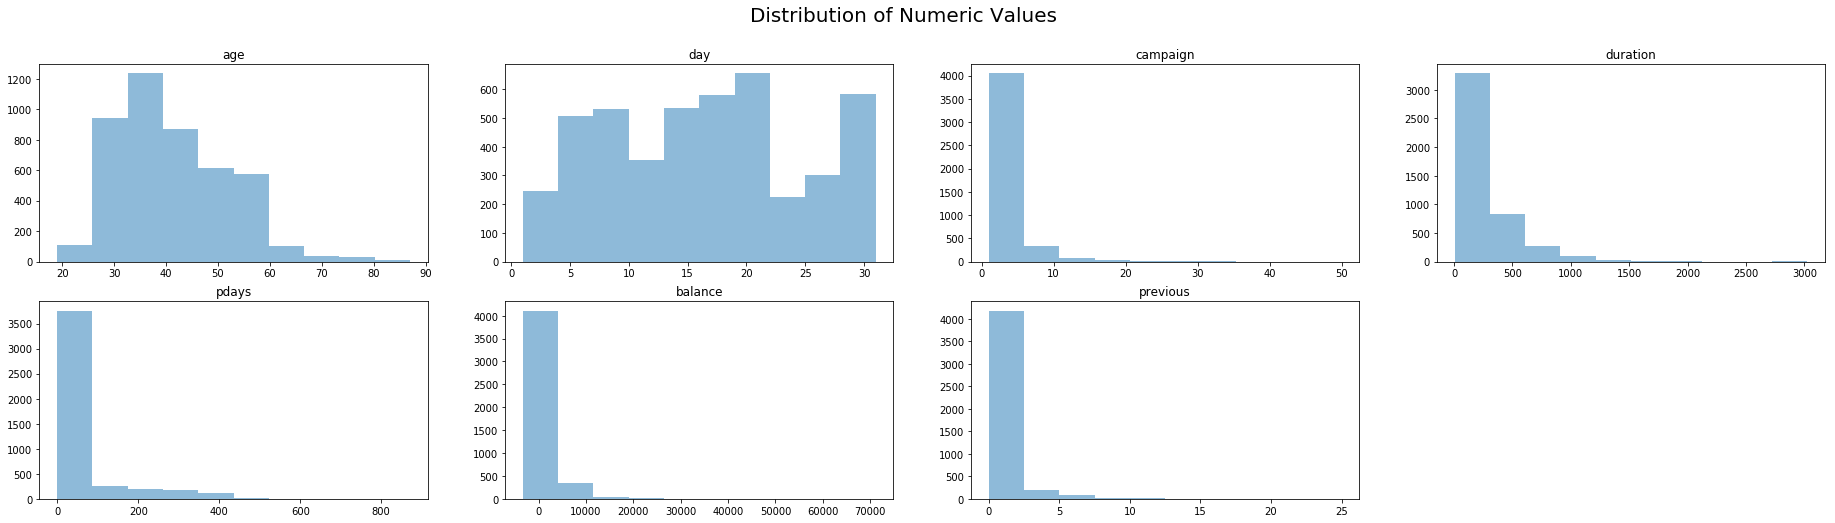

In [18]:
%matplotlib inline
fig = plt.figure(figsize=(32, 8))
for i in range(len(num_features)):
    f = list(num_features)[i]
    plt.subplot(2, 4, i+1)
    hst = plt.hist(df[f], alpha=0.5)
    plt.title(f)
plt.suptitle('Distribution of Numeric Values', fontsize=20)
None

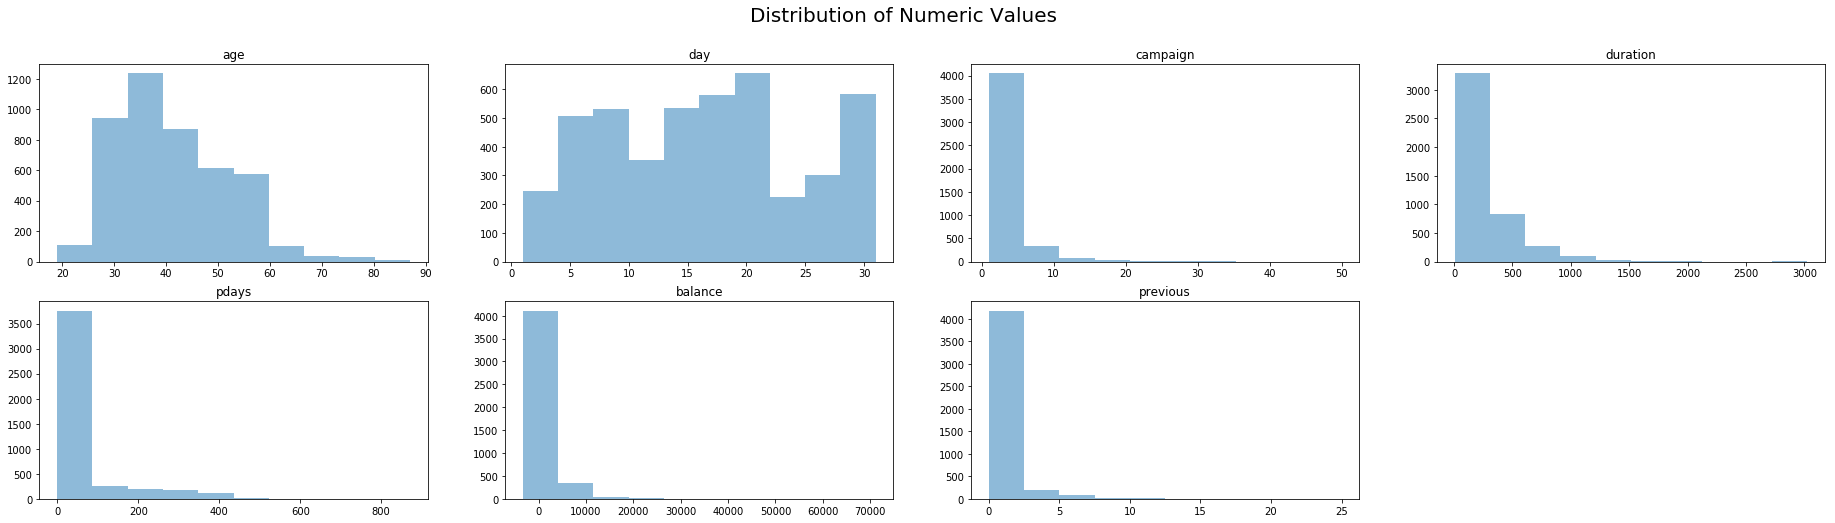

In [4]:
Image(filename='./images/dist-feat-ex-2.png') 

Now, let's look at the categorical variables and their distribution...

In [14]:
for f in cat_features:
    tab = df[f].value_counts()
    print('%s:\t%s' % (f, ', '.join([ ("%s(%d)" %(tab.index[i], tab.values[i])) for i in range(len(tab))]) ))

job:	management(969), blue-collar(946), technician(768), admin.(478), services(417), retired(230), self-employed(183), entrepreneur(168), unemployed(128), housemaid(112), student(84), unknown(38)
education:	secondary(2306), tertiary(1350), primary(678), unknown(187)
default:	no(4445), yes(76)
loan:	no(3830), yes(691)
housing:	yes(2559), no(1962)
contact:	cellular(2896), unknown(1324), telephone(301)
poutcome:	unknown(3705), failure(490), other(197), success(129)
marital:	married(2797), single(1196), divorced(528)
month:	may(1398), jul(706), aug(633), jun(531), nov(389), apr(293), feb(222), jan(148), oct(80), sep(52), mar(49), dec(20)


Results in a data frame:

In [49]:
 [ df[f].value_counts() for f in list(cat_features) ]

[management       969
 blue-collar      946
 technician       768
 admin.           478
 services         417
 retired          230
 self-employed    183
 entrepreneur     168
 unemployed       128
 housemaid        112
 student           84
 unknown           38
 Name: job, dtype: int64, yes    2559
 no     1962
 Name: housing, dtype: int64, no     3830
 yes     691
 Name: loan, dtype: int64, secondary    2306
 tertiary     1350
 primary       678
 unknown       187
 Name: education, dtype: int64, unknown    3705
 failure     490
 other       197
 success     129
 Name: poutcome, dtype: int64, no     4445
 yes      76
 Name: default, dtype: int64, cellular     2896
 unknown      1324
 telephone     301
 Name: contact, dtype: int64, married     2797
 single      1196
 divorced     528
 Name: marital, dtype: int64, may    1398
 jul     706
 aug     633
 jun     531
 nov     389
 apr     293
 feb     222
 jan     148
 oct      80
 sep      52
 mar      49
 dec      20
 Name: month, dtype

In [54]:
mat = pd.DataFrame(
    [ df[f].value_counts() for f in list(cat_features) ],
    index=list(cat_features)
    ).stack()

pd.DataFrame(mat.values, index=mat.index)

0
job       management      969.0
          blue-collar     946.0
          technician      768.0
          admin.          478.0
          services        417.0
          retired         230.0
          self-employed   183.0
          entrepreneur    168.0
          unemployed      128.0
          housemaid       112.0
          student          84.0
          unknown          38.0
housing   yes            2559.0
          no             1962.0
loan      yes             691.0
          no             3830.0
education unknown         187.0
          secondary      2306.0
          tertiary       1350.0
          primary         678.0
poutcome  unknown        3705.0
          failure         490.0
          other           197.0
          success         129.0
default   yes              76.0
          no             4445.0
contact   unknown        1324.0
          cellular       2896.0
          telephone       301.0
marital   married        2797.0
          single         1196.0
          divorced        528.0
month     may            1398.0
          jul             706.0
          aug             633.0
          jun             531.0
          nov             389.0
          apr             293.0
          feb             222.0
          jan             148.0
          oct              80.0
          sep              52.0
          mar              49.0
          dec              20.0

## Step 2: Prepare for ML algorithm
The ML algorithms in Scikit-Learn use Matrices (with numeric values). We need to convert our data-frame into a feature matrix `X` and a target vector `y`.
Many algorithms also require the features to be in the same range. Decision-trees don't bother because they don't perform any operations across features.

Use the `pd.DataFrame.as_matrix` method to convert a DataFrame into a matrix.

In [ ]:
help(pd.DataFrame.as_matrix)

In [22]:
## We copy our original dataframe into a new one, and then perform replacements on categorical levels.
## We may also keep track of our replacement
level_substitution = {}

def levels2index(levels):
    dct = {}
    for i in range(len(levels)):
        dct[levels[i]] = i
    return dct

df_num = df.copy()

for c in cat_features:
    level_substitution[c] = levels2index(df[c].unique())
    df_num[c].replace(level_substitution[c], inplace=True)

## same for target
df_num.y.replace({'no':0, 'yes':1}, inplace=True)

df_num

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,0,0,0,0,1787,0,0,0,19,0,79,1,-1,0,0,0
1,33,1,0,1,0,4789,1,1,0,11,1,220,1,339,4,1,0
2,35,2,1,2,0,1350,1,0,0,16,2,185,1,330,1,1,0
3,30,2,0,2,0,1476,1,1,1,3,3,199,4,-1,0,0,0
4,59,3,0,1,0,0,1,0,1,5,1,226,1,-1,0,0,0
5,35,2,1,2,0,747,0,0,0,23,4,141,2,176,3,1,0
6,36,4,0,2,0,307,1,0,0,14,1,341,1,330,2,2,0
7,39,5,0,1,0,147,1,0,0,6,1,151,2,-1,0,0,0
8,41,6,0,2,0,221,1,0,1,14,1,57,2,-1,0,0,0
9,43,1,0,0,0,-88,1,1,0,17,2,313,1,147,2,1,0


In [23]:
level_substitution

{'job': {'unemployed': 0,
  'services': 1,
  'management': 2,
  'blue-collar': 3,
  'self-employed': 4,
  'technician': 5,
  'entrepreneur': 6,
  'admin.': 7,
  'student': 8,
  'housemaid': 9,
  'retired': 10,
  'unknown': 11},
 'housing': {'no': 0, 'yes': 1},
 'loan': {'no': 0, 'yes': 1},
 'education': {'primary': 0, 'secondary': 1, 'tertiary': 2, 'unknown': 3},
 'poutcome': {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3},
 'default': {'no': 0, 'yes': 1},
 'contact': {'cellular': 0, 'unknown': 1, 'telephone': 2},
 'marital': {'married': 0, 'single': 1, 'divorced': 2},
 'month': {'oct': 0,
  'may': 1,
  'apr': 2,
  'jun': 3,
  'feb': 4,
  'aug': 5,
  'jan': 6,
  'jul': 7,
  'nov': 8,
  'sep': 9,
  'mar': 10,
  'dec': 11}}

## Step 3: Training
Now that we have our DataFrame prepared, we can create the feature matrix `X` and target vector `y`:
1. split data into **training** and **test** sets
2. fit the model

In [27]:
X = df_num[list(all_features)].values
y = df_num.y.values
X, y

(array([[  0,   0,  30, ...,  79,  -1,   0],
        [  1,   1,  33, ..., 220, 339,   4],
        [  1,   2,  35, ..., 185, 330,   1],
        ...,
        [  0,   1,  57, ..., 151,  -1,   0],
        [  0,   1,  28, ..., 129, 211,   3],
        [  1,   2,  44, ..., 345, 249,   7]]), array([0, 0, 0, ..., 0, 0, 0]))

In [28]:
### Scikit-learn provides us with a nice function to split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=42)

In [29]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=5)

In [30]:
clf.fit(X_train, y_train)
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)
print('Ratio of correctly classified samples for:\n\tTraining-set:\t%f\n\tTest-set:\t%f'%(score_train, score_test))

Ratio of correctly classified samples for:
	Training-set:	0.913717
	Test-set:	0.902709


`score` returns the mean accuracy on the given test data and labels. In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted. For binary classification it means **percentage of correctly classified samples**.
The score should be close to 1. Though, one single number does not tell the whole story...

## Step 4: Evaluate Model
1. predict $\hat y$ for your model on **test set**
2. calculate confusion matrix and derive measures
3. visualize if suitable

Let's see what we got. We can actually print the entire decision tree and trace for each sample ... though you may need to use the viz-wall for that.

In [33]:
import sklearn.tree
import pydot_ng as pdot
dot_data = sklearn.tree.export_graphviz(clf, out_file=None, feature_names = list(all_features), class_names=['no', 'yes'])
graph = pdot.graph_from_dot_data(dot_data)
#--- we can save the graph into a file ... preferrably vector graphics
#graph.write_svg('mydt.svg')
graph.write_pdf('/home/mengzhao/mydt.pdf')

#--- or display right here 
from IPython.display import HTML
HTML(str(graph.create_svg().decode('utf-8')))

Now, we use out classifier and predict on the test set (In order to get the `ŷ` character type: 'y\hat' followed by the TAB-key.) 

In [34]:
ŷ = clf.predict(X_test)

In [35]:
## a function that produces the confusion matrix: 1. parameter y=actual target, 2. parameter ŷ=predicted
def binary_confusion_matrix(y,ŷ):
    TP = ((y+ŷ)== 2).sum()
    TN = ((y+ŷ)== 0).sum()
    FP = ((y-ŷ)== -1).sum()
    FN = ((y-ŷ)== 1).sum()
    return pd.DataFrame( [[TP, FP], [FN, TN]], index=[['Prediction', 'Prediction'],['Yes', 'No']], columns=[['Actual', 'Actual'],['Yes', 'No']])

cm = binary_confusion_matrix(y_test, ŷ)
cm

Actual      
                  Yes    No
Prediction Yes     72    59
           No     117  1561

In [36]:
### Scikit-Learn can do that too ... so so nice though
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, ŷ)
cm

array([[1561,   59],
       [ 117,   72]])

In [37]:
### Here are some metrics 
from sklearn.metrics import classification_report
print(classification_report(y_test, ŷ))

             precision    recall  f1-score   support

          0       0.93      0.96      0.95      1620
          1       0.55      0.38      0.45       189

avg / total       0.89      0.90      0.89      1809



In [39]:
### http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py
import itertools
np.set_printoptions(precision=2)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Normalized confusion matrix
[[0.96 0.04]
 [0.62 0.38]]


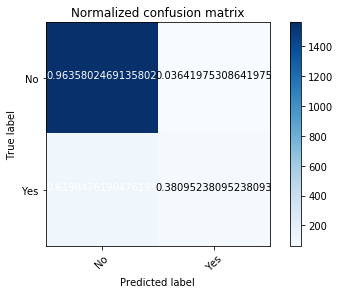

In [40]:
%matplotlib inline

fig = plt.figure()
plot_confusion_matrix(cm, classes=['No', 'Yes'], normalize=True, title='Normalized confusion matrix')
plt.show()

## Step 5: Figure out how to improve and go back to Step 2 or 3
This is an experiemnt. What can we change to improve the performance of the model?
- Include or exclude certain features
- Scale or transform values of feature vectors
- Identify outliers (noise) and remove them
- Adjust parameters of the ML algorithm 

<br>
<br>

...